In [0]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io

filename = 'LoanKuber Case Data.csv'
colnames = ["Sanctioned Loan Amount (in Laksh INR)",
            "Salaried/Self-Employed",
            #"Total Property Score(out of 36)",
            #"Total Income Score(out of 24)",
            "Total CIBIL Score(out of 18)",
            #"Total Banking Score(out of 9)",
            #"Total Demographic Score(out of 6)",
            "Property Chain Score",
            "Market Value of Property Score",
            "Length of Stay Score",
            "Last Registered Book 1 Document Score",
            "Technical Deviation Score",
            "Locality Development Score",
            "Monthly Household Income Score",
            "Stability Score",
            "Proof of Income Score",
            #"Actual CIBIL Score Score",
            #"Default Track Score",
            #"Number of Enquiries Score",
            "ABB/EMI Score",
            "Average Monthly Credit Score",
            "Number of Bounces Score",
            "Family Score",
            "Age Score",
            "Number of Financial Co-Applicants",
            "No. of presentations(till Feb '19)",
            "No. of bounces"
           ]

raw_dataframe = pd.read_csv(io.BytesIO(uploaded[filename]), 
                        header=0, 
                        usecols=colnames)

raw_dataframe = raw_dataframe[colnames]
raw_dataframe.head()



Saving LoanKuber Case Data.csv to LoanKuber Case Data.csv


,Sanctioned Loan Amount (in Laksh INR),Salaried/Self-Employed,Total CIBIL Score(out of 18),Property Chain Score,Market Value of Property Score,Length of Stay Score,Last Registered Book 1 Document Score,Technical Deviation Score,Locality Development Score,Monthly Household Income Score,Stability Score,Proof of Income Score,ABB/EMI Score,Average Monthly Credit Score,Number of Bounces Score,Family Score,Age Score,Number of Financial Co-Applicants,No. of presentations(till Feb '19),No. of bounces
0,5.5,Salaried,4,7,5,4,3,5,0,6,3,2,0,0,2,0,3,1,16,1
1,7.0,Salaried,15,4,3,4,3,5,0,4,3,4,2,4,2,1,1,1,29,0
2,7.5,Salaried,15,4,3,4,3,9,2,4,3,6,0,3,2,0,1,2,29,1
3,7.3,Salaried,18,9,3,4,3,9,2,8,6,4,2,4,2,3,3,0,28,1
4,8.0,Salaried,13,4,3,3,3,9,2,4,6,2,0,4,2,1,1,2,26,1


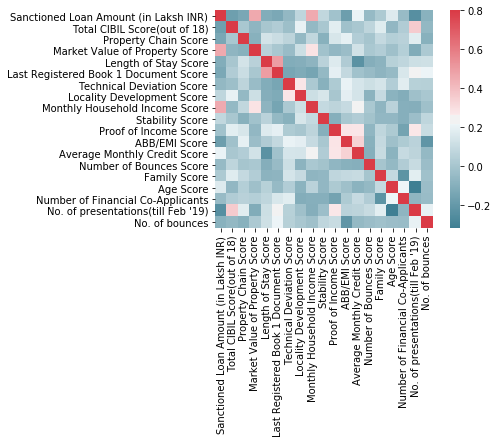

In [0]:
import numpy as np
import seaborn as sns
dataframe = raw_dataframe.copy()
dataframe = dataframe.dropna()
dataframe.isna().sum()

#sns.pairplot(data=dataframe,
#                  y_vars=["No. of bounces"],
#                  x_vars=colnames)

C_mat = dataframe.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(C_mat, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(C_mat, cmap=cmap, vmax = 0.8, square = True)


In [0]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

size = len(colnames) - 1
X = dataframe.iloc[:,0:size]
income = 'Salaried/Self-Employed'
X = pd.concat([X, pd.get_dummies(X[income], columns=[income])], axis=1)
X.pop(income)
X.head()


,Sanctioned Loan Amount (in Laksh INR),Total CIBIL Score(out of 18),Property Chain Score,Market Value of Property Score,Length of Stay Score,Last Registered Book 1 Document Score,Technical Deviation Score,Locality Development Score,Monthly Household Income Score,Stability Score,...,ABB/EMI Score,Average Monthly Credit Score,Number of Bounces Score,Family Score,Age Score,Number of Financial Co-Applicants,No. of presentations(till Feb '19),Salaried,Self-Employed,Self-Employed + Salaried
0,5.5,4,7,5,4,3,5,0,6,3,...,0,0,2,0,3,1,16,1,0,0
1,7.0,15,4,3,4,3,5,0,4,3,...,2,4,2,1,1,1,29,1,0,0
2,7.5,15,4,3,4,3,9,2,4,3,...,0,3,2,0,1,2,29,1,0,0
3,7.3,18,9,3,4,3,9,2,8,6,...,2,4,2,3,3,0,28,1,0,0
4,8.0,13,4,3,3,3,9,2,4,6,...,0,4,2,1,1,2,26,1,0,0


In [0]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from keras.utils import np_utils

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

# Create a new function:
def non_zero(x):
  return 1 if x>0 else 0

Y = dataframe.iloc[:,size]
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size = 0.2)
print(Y_train.value_counts())
print(Y_test.value_counts())

0    49
1    40
Name: No. of bounces, dtype: int64
0    13
1    10
Name: No. of bounces, dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
from sklearn import preprocessing,metrics 
from sklearn.model_selection import GridSearchCV

from scipy.stats import randint as sp_randint

from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# build a classifier
clf = RandomForestClassifier(n_estimators=20)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

random_search.fit(X, Y)
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(X, Y)
report(grid_search.cv_results_)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Model with rank: 1
Mean validation score: 0.571 (std: 0.124)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 3, 'min_samples_split': 9}

Model with rank: 2
Mean validation score: 0.536 (std: 0.099)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_split': 2}

Model with rank: 3
Mean validation score: 0.527 (std: 0.070)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_split': 2}

Model with rank: 3
Mean validation score: 0.527 (std: 0.071)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'min_samples_split': 4}

Model with rank: 1
Mean validation score: 0.598 (std: 0.122)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_split': 2}

Model with rank: 2
Mean validation score: 0.571 (std: 0.065)
Parameters: {'bootstrap': True, 'criterion': 'gin

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
import numpy
import keras
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = Sequential()
model.add(Dense(16, input_dim=21, kernel_initializer='normal', activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=500, batch_size=50,  verbose=0, validation_split=0.3)

eval_model = model.evaluate(X_train, Y_train)
eval_model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 16)                352       
_________________________________________________________________
dense_130 (Dense)            (None, 4)                 68        
_________________________________________________________________
dense_131 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_132 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_133 (Dense)            (None, 1)                 5         
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________
89/89 [==============================] - 0s 60us/step


[0.09223034659798225, 0.8876404454199116]

In [0]:
Y_pred = model.predict(X_test)
Y_pred = (Y_pred>0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[8 5]
 [8 2]]


In [0]:
predictor = raw_dataframe.copy()
inputcols = ["Sanctioned Loan Amount (in Laksh INR)",
             "Salaried/Self-Employed",
             #"Total Property Score(out of 36)",
             #"Total Income Score(out of 24)",
             "Total CIBIL Score(out of 18)",
             #"Total Banking Score(out of 9)",
             #"Total Demographic Score(out of 6)",
             "Property Chain Score",
             "Market Value of Property Score",
             "Length of Stay Score",
             "Last Registered Book 1 Document Score",
             "Technical Deviation Score",
             "Locality Development Score",
             "Monthly Household Income Score",
             "Stability Score",
             "Proof of Income Score",
             #"Actual CIBIL Score Score",
             #"Default Track Score",
             #"Number of Enquiries Score",
             "ABB/EMI Score",
             "Average Monthly Credit Score",
             "Number of Bounces Score",
             "Family Score",
             "Age Score",
             "Number of Financial Co-Applicants",
             "No. of presentations(till Feb '19)"]
predictor.dropna(subset=inputcols, inplace=True)
predictor = predictor.reset_index(drop=True)
size = len(colnames) - 1
X_predict = predictor.iloc[:,0:size]
income = 'Salaried/Self-Employed'
X_predict = pd.concat([X_predict, pd.get_dummies(X_predict[income], columns=[income])], axis=1)
X_predict.pop(income)

Y_values = model.predict(X_predict)
Y_predict = model.predict(X_test)
Y_predict = (Y_predict>0.5)

Y_predict = pd.DataFrame(Y_predict).iloc[:,0]
result = pd.concat([predictor, Y_predict], axis=1)
result.head()

,Sanctioned Loan Amount (in Laksh INR),Salaried/Self-Employed,Total CIBIL Score(out of 18),Property Chain Score,Market Value of Property Score,Length of Stay Score,Last Registered Book 1 Document Score,Technical Deviation Score,Locality Development Score,Monthly Household Income Score,...,Proof of Income Score,ABB/EMI Score,Average Monthly Credit Score,Number of Bounces Score,Family Score,Age Score,Number of Financial Co-Applicants,No. of presentations(till Feb '19),No. of bounces,0
0,5.5,Salaried,4,7,5,4,3,5,0,6,...,2,0,0,2,0,3,1,16,1,False
1,7.0,Salaried,15,4,3,4,3,5,0,4,...,4,2,4,2,1,1,1,29,0,False
2,7.5,Salaried,15,4,3,4,3,9,2,4,...,6,0,3,2,0,1,2,29,1,False
3,7.3,Salaried,18,9,3,4,3,9,2,8,...,4,2,4,2,3,3,0,28,1,False
4,8.0,Salaried,13,4,3,3,3,9,2,4,...,2,0,4,2,1,1,2,26,1,True


In [0]:
result.to_csv('Prediction.csv')
files.download('Prediction.csv')